# ***Classification Project***

**Imports**

In [91]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import datetime
from sklearn.metrics import accuracy_score, precision_score
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from google.colab import files
from sklearn.preprocessing import label_binarize
from matplotlib.cm import get_cmap
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## ***1- Pre-Processing of Data***

### ***Loading the 2015 Accidents Dataset from google drive***

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Clustering ML Project/Accidents_data.csv')

data.head(10)

<ipython-input-4-9e505f4487da>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Clustering ML Project/Accidents_data.csv')


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,201501BS70001,2015,01BS70001,525130.0,180050.0,-0.198465,51.505538,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002825
1,201501BS70002,2015,01BS70002,526530.0,178560.0,-0.178838,51.491836,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002820
2,201501BS70004,2015,01BS70004,524610.0,181080.0,-0.205590,51.514910,Metropolitan Police,Slight,1,...,Zebra,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002833
3,201501BS70005,2015,01BS70005,524420.0,181080.0,-0.208327,51.514952,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002874
4,201501BS70008,2015,01BS70008,524630.0,179040.0,-0.206022,51.496572,Metropolitan Police,Serious,2,...,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002814
5,201501BS70009,2015,01BS70009,525480.0,179530.0,-0.193610,51.500788,Metropolitan Police,Slight,2,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002816
6,201501BS70010,2015,01BS70010,526890.0,178940.0,-0.173519,51.495171,Metropolitan Police,Slight,2,...,Pedestrian phase at traffic signal junction,Daylight,Other,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002821
7,201501BS70011,2015,01BS70011,527590.0,178660.0,-0.163542,51.492497,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002861
8,201501BS70012,2015,01BS70012,524170.0,180930.0,-0.211980,51.513659,Metropolitan Police,Slight,2,...,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002879
9,201501BS70013,2015,01BS70013,525010.0,181200.0,-0.199786,51.515900,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002832


### ***Understanding The Dataset***

In [5]:
data.shape

(140056, 36)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               140056 non-null  object 
 1   accident_year                                140056 non-null  int64  
 2   accident_reference                           140056 non-null  object 
 3   location_easting_osgr                        140029 non-null  float64
 4   location_northing_osgr                       140029 non-null  float64
 5   longitude                                    140029 non-null  float64
 6   latitude                                     140029 non-null  float64
 7   police_force                                 140056 non-null  object 
 8   accident_severity                            140056 non-null  object 
 9   number_of_vehicles                           140056 non-nul

In [7]:
data.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,140056.0,140029.000000,1.400290e+05,140029.000000,140029.000000,140056.000000,140056.000000,140056.000000
mean,2015.0,446913.896086,2.899043e+05,-1.330458,52.496743,1.841014,1.329390,38.175587
std,0.0,94893.264196,1.577932e+05,1.393585,1.420984,0.710046,0.795427,13.903646
min,2015.0,70860.000000,1.062800e+04,-7.422915,49.915618,1.000000,1.000000,0.000000
25%,2015.0,385626.000000,1.766380e+05,-2.216068,51.475197,1.000000,1.000000,30.000000
50%,2015.0,451460.000000,2.408860e+05,-1.236156,52.051875,2.000000,1.000000,30.000000
75%,2015.0,526760.000000,3.911840e+05,-0.172506,53.414614,2.000000,1.000000,40.000000
max,2015.0,655282.000000,1.197917e+06,1.758443,60.661117,37.000000,38.000000,70.000000


**Understanding the effect of `road_type` on `speed_limit`**

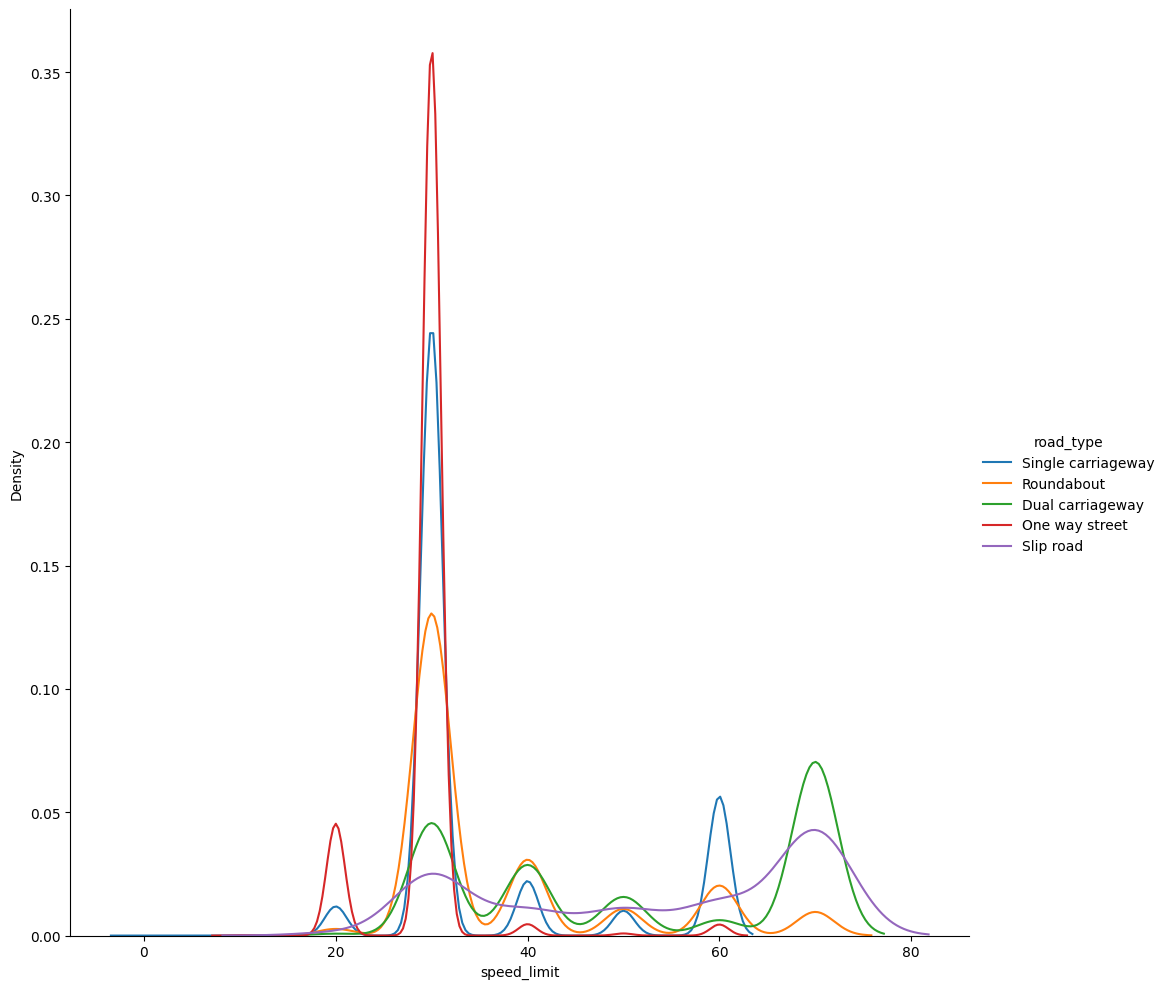

In [8]:
sns.FacetGrid(data,height=10,hue="road_type").map(sns.kdeplot,"speed_limit").add_legend()

**Observation:**
The road type and the speed limit are highly correlated

**Finding which `local_authority_district` has the most accidents**

<Axes: >

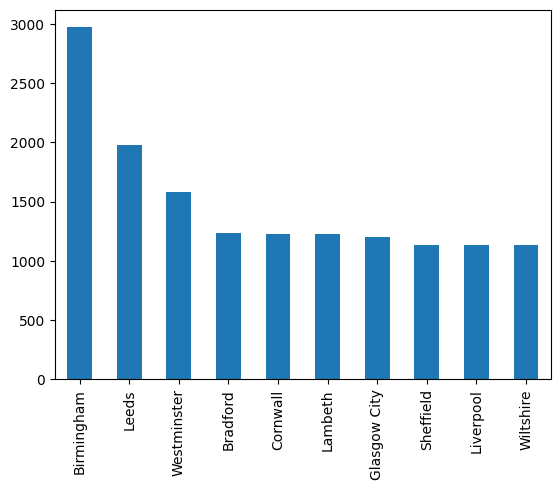

In [9]:
most_accidents = data['local_authority_district'].value_counts()[:10]
most_accidents.plot(kind = 'bar')

**Observtion:** The most of the accidents happened in Birmingham district

**Finding if there is a relation between `weather_conditions` and `accident_severity`**

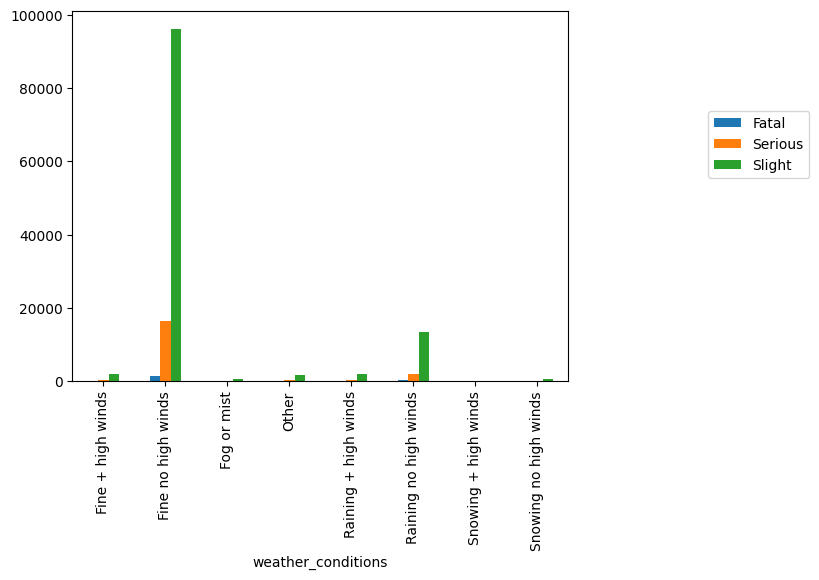

In [10]:
weather=data['weather_conditions']
accident=data['accident_severity']
weather_severity = pd.crosstab(index=weather,columns=accident)
plot_cross = weather_severity.plot(kind="bar",stacked=False)
plot_cross.legend(bbox_to_anchor=(1.5,0.75))

**Observation:** The most traffic happens when the weather is "Fine no high winds" and due to traffic, most accidents occur varying from slight,serious and fatal accidents.

**Finding the relation between `number_of_vehicles` and `accident_severity`** 

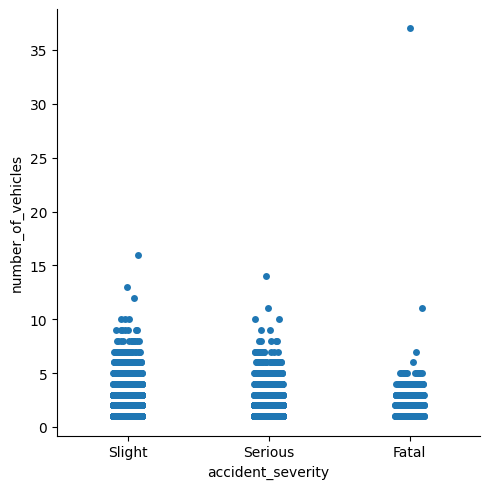

In [11]:
sns.catplot(data=data, x="accident_severity", y="number_of_vehicles")

**Observation:** In higher number of vehicles (more than 10 vehicles) the accident severity becomes more serious.

**Finding the relation between `pedestrian_crossing_human_control` and `pedestrian_crossing_physical_facilities`**

<Axes: xlabel='pedestrian_crossing_human_control'>

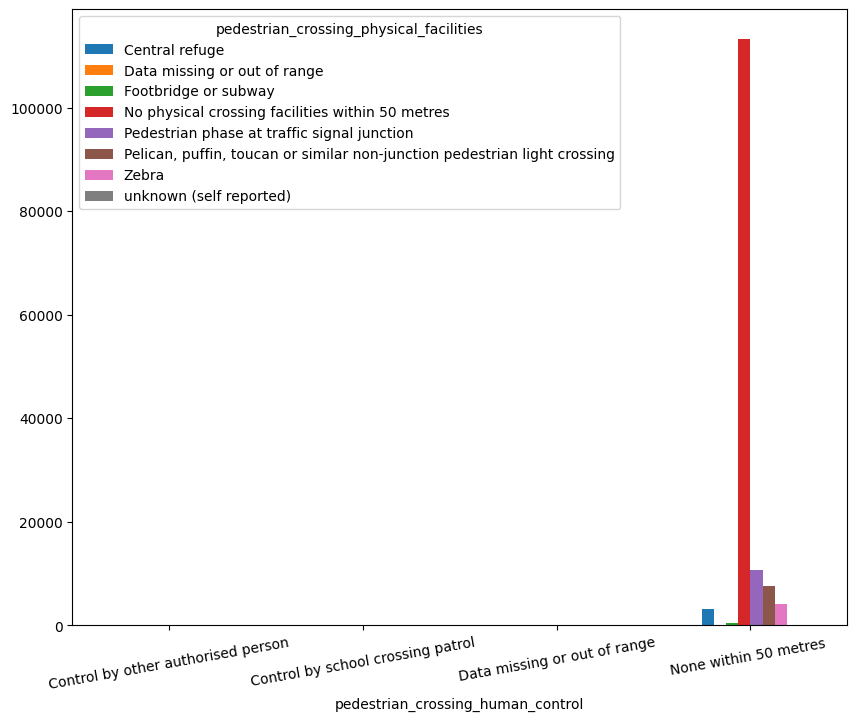

In [12]:
Cross=pd.crosstab(index=data['pedestrian_crossing_human_control'],columns=data['pedestrian_crossing_physical_facilities'])
Cross.plot.bar(figsize=(10,8),rot=10)

**Observation:** There exists a relation where if the pedestrian crossing human control in not found in the area within 50 metres, then probably there is no physical crossing facilities within 50 meters.

### ***Cleaning The Dataset***

#### **Observing and Handling Missing Data**

In [13]:
data_copy=data.copy()

In [14]:
missing=data_copy.isnull().sum()
missing

accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                             27
location_northing_osgr                            27
longitude                                         27
latitude                                          27
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

**Missing data can be of any of the following forms ( "Data missing or out of range", -1 , "-1" ). These data are replaced by NaN. Then the values "first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero " are then replaced with 0.**

In [15]:
data_copy.replace("Data missing or out of range",np.nan,inplace=True)
data_copy.replace(-1,np.nan,inplace=True)#replace -1 value to null to remove it
data_copy.replace("-1",np.nan,inplace=True)
data_copy.first_road_number.replace("first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ",0,inplace=True)
data_copy.second_road_number.replace("first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ",0,inplace=True)

In [16]:
data_copy.isnull().sum()

accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                             27
location_northing_osgr                            27
longitude                                         27
latitude                                          27
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                          808
first_road_class                                   0
first_road_number                             

In [17]:
missing_percentage = data_copy.isnull().sum() / len(data)
missing_percentage

accident_index                                 0.000000
accident_year                                  0.000000
accident_reference                             0.000000
location_easting_osgr                          0.000193
location_northing_osgr                         0.000193
longitude                                      0.000193
latitude                                       0.000193
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000000
day_of_week                                    0.000000
time                                           0.000000
local_authority_district                       0.000000
local_authority_ons_district                   0.000000
local_authority_highway                        0.005769
first_road_class                               0

In [18]:
missing_mean=data_copy.isnull().mean()*100
missing_mean

accident_index                                  0.000000
accident_year                                   0.000000
accident_reference                              0.000000
location_easting_osgr                           0.019278
location_northing_osgr                          0.019278
longitude                                       0.019278
latitude                                        0.019278
police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_district                        0.000000
local_authority_ons_district                    0.000000
local_authority_highway                         0.576912
first_road_class               

**The four columns `location_easting_osgr`, `location_northing_osgr`, `longitude` and `latitude` has less than 0.05% of the data missing so the rows that has this missing values are deleted. .**

In [19]:
data_copy.dropna(axis="index",how="all",subset=["location_easting_osgr"],inplace=True)
data_copy.dropna(axis="index",how="all",subset=["location_northing_osgr"],inplace=True)
data_copy.dropna(axis="index",how="all",subset=["longitude"],inplace=True)
data_copy.dropna(axis="index",how="all",subset=["latitude"],inplace=True)

**The column `junction_detail` and `did_police_officer_attend_scene_of_accident` has only 1 and 8 values of data missing and the missing data is replaced by the frequent category variable.**

In [20]:
most_frequent_value_junction = data_copy['junction_detail'].value_counts().idxmax()
most_frequent_value_attend = data_copy['did_police_officer_attend_scene_of_accident'].value_counts().idxmax()

print("Most frequent value in the 'junction_detail' column:", most_frequent_value_junction)
print("Most frequent value in the 'did_police_officer_attend_scene_of_accident' column:", most_frequent_value_attend)

Most frequent value in the 'junction_detail' column: Not at junction or within 20 metres
Most frequent value in the 'did_police_officer_attend_scene_of_accident' column: Yes


In [21]:
data_copy["junction_detail"].fillna(value="Not at junction or within 20 metres",inplace=True)
data_copy["did_police_officer_attend_scene_of_accident"].fillna(value="Yes",inplace=True)

**The column `local_authority_highway` and `road_type`has 808 and 806 values of data missing and the missing data is replaced by the frequent category variable.**

In [22]:
data_copy["local_authority_highway"].fillna(value="Not at junction or within 20 metres",inplace=True)
data_copy["road_type"].fillna(value="Not at junction or within 20 metres",inplace=True)

**The column `junction_control` has nearly 40% of data missing and this missing data is replaced by missing category which is "No junction".**

In [23]:
data_copy["junction_control"].fillna(value="No junction",inplace=True)

**The two columns `second_road_class`and `second_road_number` has nearly 40% of data missing, these two columns are deleted.**

In [24]:
data_copy.drop('second_road_class', inplace=True, axis=1)
data_copy.drop('second_road_number', inplace=True, axis=1)

**The column `pedestrian_crossing_human_control` and `pedestrian_crossing_physical_facilities` has 140 and 125 values of data missing and this missing data is replaced by the frequent category variable**.

In [25]:
data_copy["pedestrian_crossing_human_control"].fillna(value="None within 50 metres",inplace=True)
data_copy["pedestrian_crossing_physical_facilities"].fillna(value="No physical crossing facilities within 50 metres",inplace=True)

**The column `weather_conditions` has 2467 and the column `road_surface_conditions` has 284 values of data are missing, as there is a correlation between the weather and road surface conditions, then the missing data in the `weather_conditions` is filled according to the `road_surface_conditions` and vice versa.**

In [26]:
for index, row in data_copy.iterrows():
    if(row['weather_conditions']=="Snowing no high winds" or row['weather_conditions']=="Snowing + high winds" and type(row['weather_conditions'])==float):
        data_copy.at[index,"road_surface_conditions"]="Snow"
    if(row['weather_conditions']=="Raining no high winds" or row['weather_conditions']=="Raining + high winds"and type(row['weather_conditions'])==float):
        data_copy.at[index,"road_surface_conditions"]="Wet or damp"
    if(row['road_surface_conditions']=="Snow" and type(row['weather_conditions'])==float):
        data_copy.at[index,"weather_conditions"]="Snowing no high winds"
    if(row['road_surface_conditions']=="Wet or damp" and type(row['weather_conditions'])==float):
        data_copy.at[index,"weather_conditions"]="Raining no high winds" 

Not all the missing data could be imputed by this method, so the rest of the missing data is filled randomly.

In [27]:
while(data_copy["weather_conditions"].isnull().sum()!=0):
    data_copy["weather_conditions"].fillna(np.random.choice(data_copy['weather_conditions'][~data_copy['weather_conditions'].isna()]),inplace = True,limit=1)
    
while(data_copy["road_surface_conditions"].isnull().sum()!=0):
    data_copy["road_surface_conditions"].fillna(np.random.choice(data_copy['road_surface_conditions'][~data_copy['road_surface_conditions'].isna()]),inplace = True,limit=1)

**The columns `special_conditions_at_site` and `carriageway_hazards` has 106 and 95 values of data are missing and this missing data is replaced by the frequent category variable.**

In [31]:
most_frequent_value_special = data_copy['special_conditions_at_site'].value_counts().idxmax()
most_frequent_value_hazard = data_copy['carriageway_hazards'].value_counts().idxmax()

print("Most frequent value in the 'special_conditions_at_site ' column:", most_frequent_value_special)
print("Most frequent value in the 'carriageway_hazards ' column:", most_frequent_value_hazard)

Most frequent value in the 'special_conditions_at_site ' column: None
Most frequent value in the 'carriageway_hazards ' column: None


In [32]:
data_copy["special_conditions_at_site"].fillna(value="None",inplace=True)
data_copy["carriageway_hazards"].fillna(value="None",inplace=True)

**The columns `trunk_road_flag` and `lsoa_of_accident_location` has nearly 10% and 6%, these two columns are deleted.**

In [33]:
data_copy.drop('trunk_road_flag', inplace=True, axis=1)
data_copy.drop('lsoa_of_accident_location', inplace=True, axis=1)

**Observing if there is any missing data**

In [34]:
data_copy.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [35]:
data_copy.shape

(140029, 32)

#### **Observing and handling Outliers**

In [36]:
data_copy.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,140029.0,140029.000000,1.400290e+05,140029.000000,140029.000000,140029.000000,140029.000000,140029.000000
mean,2015.0,446913.896086,2.899043e+05,-1.330458,52.496743,1.840990,1.329382,38.175378
std,0.0,94893.264196,1.577932e+05,1.393585,1.420984,0.710077,0.795430,13.903750
min,2015.0,70860.000000,1.062800e+04,-7.422915,49.915618,1.000000,1.000000,0.000000
25%,2015.0,385626.000000,1.766380e+05,-2.216068,51.475197,1.000000,1.000000,30.000000
50%,2015.0,451460.000000,2.408860e+05,-1.236156,52.051875,2.000000,1.000000,30.000000
75%,2015.0,526760.000000,3.911840e+05,-0.172506,53.414614,2.000000,1.000000,40.000000
max,2015.0,655282.000000,1.197917e+06,1.758443,60.661117,37.000000,38.000000,70.000000


##### **Outliers `location_easting_osgr`**

In [37]:
location_easting_osgr= data_copy['location_easting_osgr'].sort_values()
print(location_easting_osgr)

131700     70860.0
131710     74605.0
131695     75210.0
131711     75426.0
131693     78594.0
            ...   
83246     654967.0
83321     655017.0
83459     655022.0
83552     655120.0
83724     655282.0
Name: location_easting_osgr, Length: 140029, dtype: float64


In [38]:
outliers_location_easting_osgr=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_location_easting_osgr.append(i)
    return outliers_location_easting_osgr

outliers_pt_location_easting_osgr= detect_outliers(location_easting_osgr)
outliers_pt_location_easting_osgr

[70860.0,
 74605.0,
 75210.0,
 75426.0,
 78594.0,
 80216.0,
 81935.0,
 90609.0,
 90833.0,
 98230.0,
 104299.0,
 110336.0,
 114006.0,
 114388.0,
 115063.0,
 119348.0,
 119505.0,
 120586.0,
 123050.0,
 125988.0,
 127531.0,
 129720.0,
 130237.0,
 130947.0,
 131074.0,
 131679.0,
 132553.0,
 132814.0,
 133498.0,
 133659.0,
 134121.0,
 134336.0,
 134374.0,
 135857.0,
 136554.0,
 137256.0,
 137345.0,
 137608.0,
 137651.0,
 137697.0,
 137923.0,
 138116.0,
 138597.0,
 138765.0,
 139005.0,
 139550.0,
 139592.0,
 140040.0,
 141099.0,
 141121.0,
 141707.0,
 141864.0,
 142015.0,
 142022.0,
 142310.0,
 142315.0,
 142389.0,
 142399.0,
 142523.0,
 142531.0,
 142872.0,
 143047.0,
 143499.0,
 144454.0,
 144702.0,
 145801.0,
 145985.0,
 145985.0,
 146039.0,
 146051.0,
 146223.0,
 146225.0,
 146258.0,
 146281.0,
 146308.0,
 146422.0,
 146452.0,
 146578.0,
 146598.0,
 146748.0,
 146765.0,
 146821.0,
 146909.0,
 146922.0,
 146923.0,
 146926.0,
 146956.0,
 146957.0,
 147090.0,
 147091.0,
 147105.0,
 147134.0

In [39]:
quantile1_location_easting_osgr, quantile3_location_easting_osgr= np.percentile(location_easting_osgr,[25,75])
print(quantile1_location_easting_osgr,quantile3_location_easting_osgr)

385626.0 526760.0


141134.0
173925.0 315059.0


<Axes: >

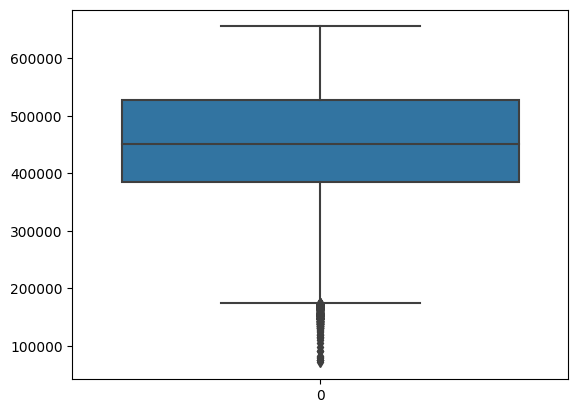

In [40]:
iqr_value= quantile3_location_easting_osgr-quantile1_location_easting_osgr
print(iqr_value)

lower_bound_val= quantile1_location_easting_osgr -(1.5* iqr_value)
upper_bound_val= quantile3_location_easting_osgr -(1.5* iqr_value)
print(lower_bound_val, upper_bound_val)
sns.boxplot(location_easting_osgr)

##### **Outliers `location_northing_osgr`**

In [41]:
location_northing_osgr= data_copy['location_northing_osgr'].sort_values()
print(location_northing_osgr)

115348      10628.0
115192      18201.0
115191      19648.0
115187      19868.0
115188      19871.0
            ...    
131786    1156617.0
131794    1158577.0
131785    1163829.0
131776    1167690.0
131790    1197917.0
Name: location_northing_osgr, Length: 140029, dtype: float64


In [42]:
outliers_location_northing_osgr=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_location_northing_osgr.append(i)
    return outliers_location_northing_osgr

outliers_pt_location_northing_osgr= detect_outliers(location_northing_osgr)
outliers_pt_location_northing_osgr

[763598.0,
 763633.0,
 763934.0,
 763954.0,
 764319.0,
 764713.0,
 764758.0,
 764832.0,
 765253.0,
 765760.0,
 765762.0,
 766001.0,
 767972.0,
 768109.0,
 768347.0,
 768694.0,
 769959.0,
 770115.0,
 770267.0,
 770311.0,
 770806.0,
 772088.0,
 772486.0,
 772487.0,
 772512.0,
 772798.0,
 772954.0,
 773218.0,
 774233.0,
 774461.0,
 774955.0,
 775175.0,
 776018.0,
 776980.0,
 777239.0,
 778660.0,
 778818.0,
 778858.0,
 779963.0,
 780549.0,
 780773.0,
 781007.0,
 781010.0,
 781012.0,
 781649.0,
 781731.0,
 781793.0,
 781877.0,
 782457.0,
 783175.0,
 784122.0,
 784296.0,
 784296.0,
 784297.0,
 784636.0,
 785392.0,
 787213.0,
 787217.0,
 787370.0,
 787807.0,
 788171.0,
 788175.0,
 788700.0,
 788885.0,
 789378.0,
 789592.0,
 789796.0,
 789989.0,
 790083.0,
 790850.0,
 791147.0,
 791184.0,
 791380.0,
 791411.0,
 791441.0,
 792197.0,
 792344.0,
 793601.0,
 793715.0,
 794051.0,
 794229.0,
 794277.0,
 794311.0,
 794402.0,
 794806.0,
 795050.0,
 795209.0,
 795348.0,
 795792.0,
 795834.0,
 795840.0,

In [43]:
quantile1_location_northing_osgr, quantile3_location_northing_osgr= np.percentile(location_northing_osgr,[25,75])
print(quantile1_location_northing_osgr,quantile3_location_northing_osgr)

176638.0 391184.0


141134.0
-35063.0 179483.0


<Axes: >

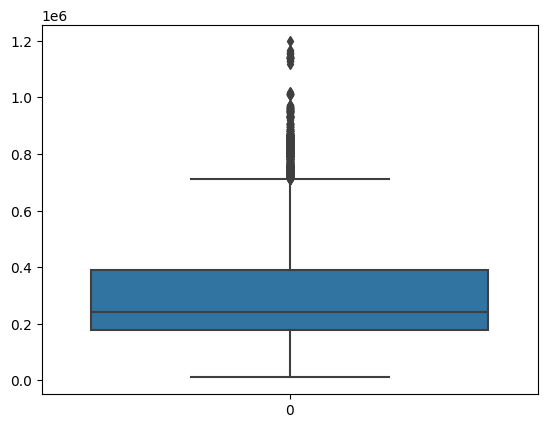

In [44]:
iqr_value1= quantile3_location_northing_osgr-quantile1_location_northing_osgr
print(iqr_value)

lower_bound_val1= quantile1_location_northing_osgr -(1.5* iqr_value)
upper_bound_val1= quantile3_location_northing_osgr -(1.5* iqr_value)
print(lower_bound_val1, upper_bound_val1)
sns.boxplot(location_northing_osgr)

##### **Outliers `longitude`**

In [45]:
longitude= data_copy['longitude'].sort_values()
print(longitude)

131700   -7.422915
131710   -7.389288
131693   -7.377012
131695   -7.376428
131711   -7.371592
            ...   
84189     1.753729
83321     1.754268
83459     1.754871
83552     1.755569
83724     1.758443
Name: longitude, Length: 140029, dtype: float64


In [46]:
outliers_longitude=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_longitude.append(i)
    return outliers_longitude

outliers_pt_longitude= detect_outliers(longitude)
outliers_pt_longitude

[-7.422915,
 -7.389288,
 -7.377012,
 -7.376428,
 -7.371592,
 -7.326671000000001,
 -7.315794,
 -7.178043,
 -6.929676,
 -6.908506,
 -6.832917999999999,
 -6.818255000000001,
 -6.8095,
 -6.807599000000001,
 -6.7474940000000005,
 -6.746625,
 -6.728705000000001,
 -6.6630720000000005,
 -6.659942999999999,
 -6.542978,
 -6.542301,
 -6.521887,
 -6.506745,
 -6.48993,
 -6.470362000000001,
 -6.46892,
 -6.465781,
 -6.460157,
 -6.433841,
 -6.412644,
 -6.394841,
 -6.389745,
 -6.388391,
 -6.38733,
 -6.385993,
 -6.367003,
 -6.351737,
 -6.312733000000001,
 -6.311427,
 -6.304278,
 -6.300303,
 -6.297473,
 -6.288005,
 -6.287493,
 -6.284987999999999,
 -6.2610470000000005,
 -6.257709999999999,
 -6.2514,
 -6.2494760000000005,
 -6.229124,
 -6.206409,
 -6.2054860000000005,
 -6.200871,
 -6.196286,
 -6.194918,
 -6.1868620000000005,
 -6.173689,
 -6.158795,
 -6.15506,
 -6.099521,
 -6.0952150000000005,
 -6.094642,
 -6.091949,
 -6.091197,
 -6.091044999999999,
 -6.087776,
 -6.084608,
 -6.000133,
 -5.91421,
 -5.899302,


In [47]:
quantile1_longitude, quantile3_longitude= np.percentile(longitude,[25,75])
print(quantile1_longitude,quantile3_longitude)

-2.216068 -0.172506


141134.0
-211703.216068 -211701.172506


<Axes: >

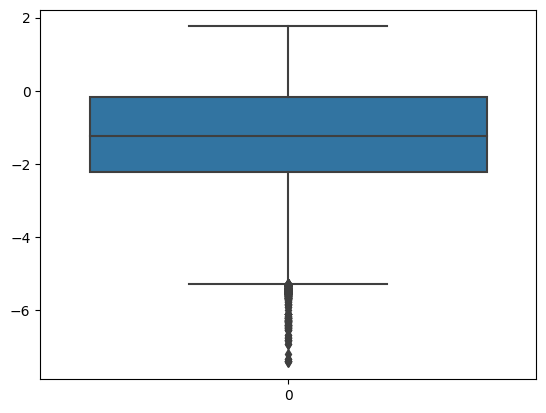

In [48]:
iqr_value1= quantile3_longitude-quantile1_longitude
print(iqr_value)

lower_bound_val1= quantile1_longitude -(1.5* iqr_value)
upper_bound_val1= quantile3_longitude -(1.5* iqr_value)
print(lower_bound_val1, upper_bound_val1)
sns.boxplot(longitude)

##### **Outliers `latitude`**

In [49]:
latitude= data_copy['latitude'].sort_values()
print(latitude)

115348    49.915618
115192    50.022633
115187    50.033220
115188    50.033245
115191    50.033652
            ...    
131786    60.292188
131794    60.309161
131785    60.356442
131776    60.391536
131790    60.661117
Name: latitude, Length: 140029, dtype: float64


In [50]:
outliers_latitude=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_latitude.append(i)
    return outliers_latitude

outliers_pt_latitude= detect_outliers(latitude)
outliers_pt_latitude

[56.759814,
 56.761093,
 56.764742000000005,
 56.765411,
 56.766184,
 56.766417,
 56.772932,
 56.774368,
 56.782776,
 56.782794,
 56.783901,
 56.784326,
 56.802841,
 56.80344300000001,
 56.804026,
 56.805365,
 56.805938,
 56.80664599999999,
 56.808486,
 56.821017000000005,
 56.824453000000005,
 56.828152,
 56.828405,
 56.839929000000005,
 56.84375,
 56.846353,
 56.846654,
 56.847862,
 56.850091000000006,
 56.85536,
 56.860865,
 56.86289,
 56.864841000000006,
 56.86576,
 56.876163,
 56.881086,
 56.883569,
 56.886753000000006,
 56.889183,
 56.88973299999999,
 56.890332,
 56.89385,
 56.900148,
 56.90051,
 56.920225,
 56.920243000000006,
 56.926669,
 56.933091000000005,
 56.938327,
 56.948142,
 56.94971700000001,
 56.94971700000001,
 56.949726,
 56.950608,
 56.952647,
 56.952776,
 56.959574,
 56.961851,
 56.965451,
 56.968511,
 56.972026,
 56.975924,
 56.97596,
 56.980741,
 56.989234,
 56.990759,
 56.99799,
 57.00011899999999,
 57.000542,
 57.000727000000005,
 57.002083,
 57.004985,
 57.00

In [51]:
quantile1_latitude, quantile3_latitude= np.percentile(latitude,[25,75])
print(quantile1_latitude,quantile3_latitude)

51.475197 53.414614


141134.0
-211649.524803 -211647.585386


<Axes: >

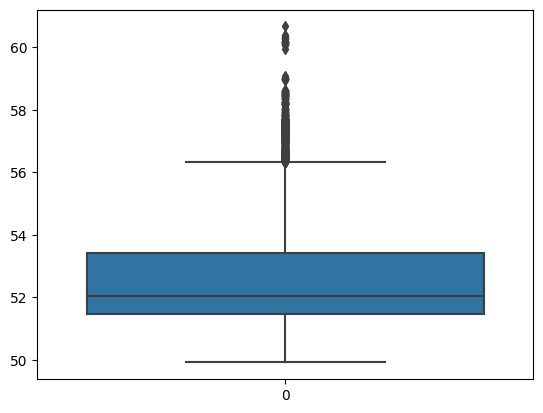

In [52]:
iqr_value1= quantile3_latitude-quantile1_latitude
print(iqr_value)

lower_bound_val1= quantile1_latitude -(1.5* iqr_value)
upper_bound_val1= quantile3_latitude -(1.5* iqr_value)
print(lower_bound_val1, upper_bound_val1)
sns.boxplot(latitude)

##### **Outliers `number_of_vehicles`**


In [53]:
number_of_vehicles= data_copy['number_of_vehicles'].sort_values()
print(number_of_vehicles)

0          1
42787      1
42788      1
42789      1
42790      1
          ..
32436     12
140055    13
107713    14
66100     16
94653     37
Name: number_of_vehicles, Length: 140029, dtype: int64


In [54]:
outliers_number_of_vehicles=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_number_of_vehicles.append(i)
    return outliers_number_of_vehicles

outliers_pt_number_of_vehicles= detect_outliers(number_of_vehicles)
outliers_pt_number_of_vehicles

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [55]:
quantile1_number_of_vehicles, quantile3_number_of_vehicles= np.percentile(number_of_vehicles,[25,75])
print(quantile1_number_of_vehicles,quantile3_number_of_vehicles)

1.0 2.0


141134.0
-211700.0 -211699.0


<Axes: >

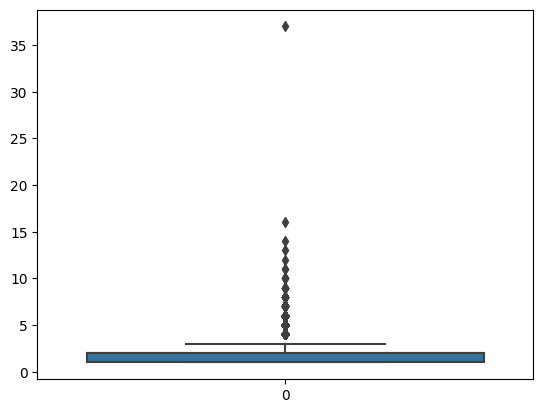

In [56]:
iqr_value2= quantile3_number_of_vehicles-quantile1_number_of_vehicles
print(iqr_value)

lower_bound_val2= quantile1_number_of_vehicles -(1.5* iqr_value)
upper_bound_val2= quantile3_number_of_vehicles -(1.5* iqr_value)
print(lower_bound_val2, upper_bound_val2)
sns.boxplot(number_of_vehicles)

##### **Outliers `number_of_casualties`**

In [57]:
number_of_casualties= data_copy['number_of_casualties'].sort_values()
print(number_of_casualties)

0          1
87808      1
87807      1
87805      1
87804      1
          ..
112784    34
128206    35
94653     36
138271    36
92001     38
Name: number_of_casualties, Length: 140029, dtype: int64


In [58]:
outliers_number_of_casualties=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_number_of_casualties.append(i)
    return outliers_number_of_casualties

outliers_pt_number_of_casualties= detect_outliers(number_of_casualties)
outliers_pt_number_of_casualties

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [59]:
quantile1_number_of_casualties, quantile3_number_of_casualties= np.percentile(number_of_casualties,[25,75])
print(quantile1_number_of_casualties,quantile3_number_of_casualties)

1.0 1.0


0.0
1.0 1.0


<Axes: >

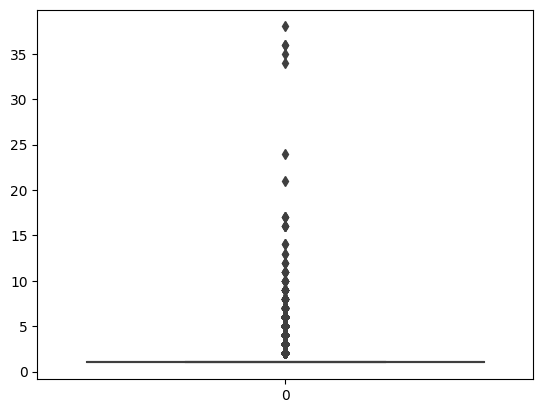

In [60]:
iqr_value= quantile3_number_of_casualties-quantile1_number_of_casualties
print(iqr_value)

lower_bound_val3= quantile1_number_of_casualties -(1.5* iqr_value)
upper_bound_val3= quantile3_number_of_casualties -(1.5* iqr_value)
print(lower_bound_val3, upper_bound_val3)
sns.boxplot(number_of_casualties)

##### **Outliers `speed_limit`**

In [61]:
speed_limit= data_copy['speed_limit'].sort_values()
print(speed_limit)

121311     0.0
22799     10.0
1947      10.0
26143     20.0
111707    20.0
          ... 
113846    70.0
119352    70.0
113844    70.0
91408     70.0
140055    70.0
Name: speed_limit, Length: 140029, dtype: float64


In [62]:
outliers_speed_limit=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_speed_limit.append(i)
    return outliers_speed_limit

outliers_pt_speed_limit= detect_outliers(speed_limit)
outliers_pt_speed_limit

[]

In [63]:
quantile1_speed_limit, quantile3_speed_limit= np.percentile(speed_limit,[25,75])
print(quantile1_speed_limit,quantile3_speed_limit)

30.0 40.0


10.0
15.0 25.0


<Axes: >

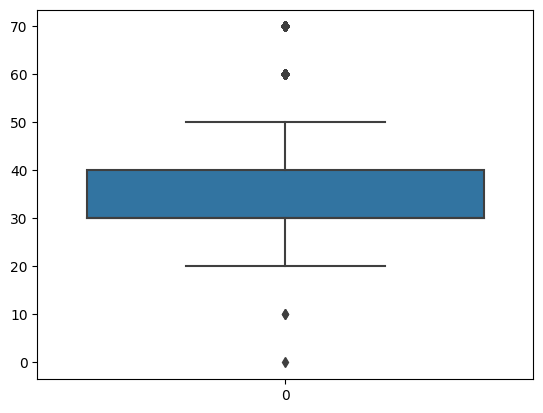

In [64]:
iqr_value= quantile3_speed_limit-quantile1_speed_limit
print(iqr_value)

lower_bound_val4= quantile1_speed_limit -(1.5* iqr_value)
upper_bound_val4= quantile3_speed_limit -(1.5* iqr_value)
print(lower_bound_val4, upper_bound_val4)
sns.boxplot(speed_limit)

#### ***Data Transformation***

##### **Discretization**

We discretisize the data into weeks using the date by adding new column `week_number` that calculates the week number in which the accident had happened according to the date of the accident.

In [65]:
data_copy["date"] = pd.to_datetime(data_copy["date"])
data_copy.insert(11, 'week_number' ,data_copy['date'].dt.isocalendar().week)
data_copy.head()

<ipython-input-65-f77f9fce3532>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_copy["date"] = pd.to_datetime(data_copy["date"])


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,201501BS70001,2015,01BS70001,525130.0,180050.0,-0.198465,51.505538,Metropolitan Police,Slight,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes
1,201501BS70002,2015,01BS70002,526530.0,178560.0,-0.178838,51.491836,Metropolitan Police,Slight,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes
2,201501BS70004,2015,01BS70004,524610.0,181080.0,-0.205590,51.514910,Metropolitan Police,Slight,1,...,Give way or uncontrolled,None within 50 metres,Zebra,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes
3,201501BS70005,2015,01BS70005,524420.0,181080.0,-0.208327,51.514952,Metropolitan Police,Slight,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,No
4,201501BS70008,2015,01BS70008,524630.0,179040.0,-0.206022,51.496572,Metropolitan Police,Serious,2,...,Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet or damp,None,None,Urban,No


##### **Categorial Encoding**

In [66]:
categorical_data = data_copy.select_dtypes(include=['object'])
print(categorical_data.shape)

(140029, 23)


##### **Label Encoding**

In [67]:
categorical_data.columns

Index(['accident_index', 'accident_reference', 'police_force',
       'accident_severity', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'junction_detail',
       'junction_control', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident'],
      dtype='object')

In [68]:
columns_to_encode = ['accident_severity','police_force', 'day_of_week', 'local_authority_district','local_authority_ons_district','local_authority_highway','road_type','junction_detail','junction_control','weather_conditions','road_surface_conditions','special_conditions_at_site','carriageway_hazards','first_road_class','urban_or_rural_area','did_police_officer_attend_scene_of_accident','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','light_conditions']

# Initialize the LabelEncoder object
label_encoders = {}

# Apply label encoding to the selected columns
for column in columns_to_encode:
    label_encoder = LabelEncoder()
    categorical_data[column] = label_encoder.fit_transform(categorical_data[column])
    label_encoders[column] = label_encoder

# Retrieve the mapping of label encoding
label_mapping = {}
for column, label_encoder in label_encoders.items():
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping
for column, mapping in label_mapping.items():
    print(f"Label mapping for {column}:")
    for label, encoded_value in mapping.items():
        print(f"{label}: {encoded_value}")
    print()


Label mapping for accident_severity:
Fatal: 0
Serious: 1
Slight: 2

Label mapping for police_force:
Avon and Somerset: 0
Bedfordshire: 1
Cambridgeshire: 2
Central: 3
Cheshire: 4
City of London: 5
Cleveland: 6
Cumbria: 7
Derbyshire: 8
Devon and Cornwall: 9
Dorset: 10
Dumfries and Galloway: 11
Durham: 12
Dyfed-Powys: 13
Essex: 14
Fife: 15
Gloucestershire: 16
Grampian: 17
Greater Manchester: 18
Gwent: 19
Hampshire: 20
Hertfordshire: 21
Humberside: 22
Kent: 23
Lancashire: 24
Leicestershire: 25
Lincolnshire: 26
Lothian and Borders: 27
Merseyside: 28
Metropolitan Police: 29
Norfolk: 30
North Wales: 31
North Yorkshire: 32
Northamptonshire: 33
Northern: 34
Northumbria: 35
Nottinghamshire: 36
South Wales: 37
South Yorkshire: 38
Staffordshire: 39
Strathclyde: 40
Suffolk: 41
Surrey: 42
Sussex: 43
Tayside: 44
Thames Valley: 45
Warwickshire: 46
West Mercia: 47
West Midlands: 48
West Yorkshire: 49
Wiltshire: 50

Label mapping for day_of_week:
Friday: 0
Monday: 1
Saturday: 2
Sunday: 3
Thursday: 4
Tue

In [69]:
categorical_data.drop('accident_reference', axis=1, inplace=True)

In [70]:
# Replace the column with numbers from 0 until its length
column_name = 'accident_index'
column_length = len(categorical_data['accident_index'])
categorical_data[column_name] = range(column_length)

In [71]:
proc_data = categorical_data

In [72]:
proc_data.drop('time',axis=1,inplace=True)

In [73]:
proc_data.head()

,accident_index,police_force,accident_severity,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,...,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,0,29,2,1,166,168,89,3,0,4,...,2,3,2,1,1,0,3,1,1,1
1,1,29,2,1,166,168,89,5,0,4,...,2,3,2,4,1,0,3,1,1,1
2,2,29,2,1,166,168,89,2,415,4,...,2,3,5,1,5,4,3,1,1,1
3,3,29,2,5,166,168,89,2,450,4,...,2,3,2,4,1,4,3,1,1,0
4,4,29,1,0,166,168,89,0,315,4,...,1,3,3,4,5,4,3,1,1,0


***The vairables we have in our dataset are either continous random variables or discrete random variables that does not need neither normalisation nor scaling.***

## ***2- Using Diagnostic Techniques***

In [74]:
proc_data.head()

,accident_index,police_force,accident_severity,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,...,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,0,29,2,1,166,168,89,3,0,4,...,2,3,2,1,1,0,3,1,1,1
1,1,29,2,1,166,168,89,5,0,4,...,2,3,2,4,1,0,3,1,1,1
2,2,29,2,1,166,168,89,2,415,4,...,2,3,5,1,5,4,3,1,1,1
3,3,29,2,5,166,168,89,2,450,4,...,2,3,2,4,1,4,3,1,1,0
4,4,29,1,0,166,168,89,0,315,4,...,1,3,3,4,5,4,3,1,1,0


In [75]:
print(proc_data.columns)

Index(['accident_index', 'police_force', 'accident_severity', 'day_of_week',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident'],
      dtype='object')


In [86]:
data_X = proc_data[['accident_index','police_force', 'day_of_week', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident']]
data_y = proc_data['accident_severity']

scaler = StandardScaler()
scaler.fit(data_X)
scaled_feature = scaler.transform(data_X)

data_scaled = pd.DataFrame(scaled_feature,columns= ['accident_index','police_force', 'day_of_week', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident'])

data_scaled.head()


X, X_test, y, y_test =train_test_split(data_scaled,
                                      data_y,
                                      test_size=0.2,
                                      random_state=0)
X_train, X_CV, y_train, y_CV =train_test_split(X,y,
                                               test_size=0.25,
                                               random_state=0)

print(X_train.shape,X_test.shape,X_CV.shape)

(84017, 20) (28006, 20) (28006, 20)


### **Implementing K-Fold Sampling**

In [78]:
k = 10

# Initialize the KFold object
kf = KFold(n_splits=k)

# Create a list to store the accuracy scores for each fold
accuracy_scores_LR = []
accuracy_scores_NB = []
accuracy_scores_KNN = []
accuracy_scores_NN = []

# Convert dataset to NumPy array
X = X.values
y = y.values

# Iterate over the K folds for Logistic Regression Model

model = LogisticRegression(max_iter=100000)
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the fold indices
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_LR.append(accuracy)

# Compute the average accuracy across all folds
avg_accuracy_LR = sum(accuracy_scores_LR) / len(accuracy_scores_LR)

# Print the accuracy scores for each fold and the average accuracy
print("Logistic Regression:")
print("Accuracy scores for each fold:", accuracy_scores_LR)
print("Average accuracy for K-Fold Sampling:", avg_accuracy_LR)

print("---------------------------------------------------")

# Iterate over the K folds for Naive Bays Model

model = GaussianNB()

for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the fold indices
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_NB.append(accuracy)

# Compute the average accuracy across all folds
avg_accuracy_NB = sum(accuracy_scores_NB) / len(accuracy_scores_NB)

# Print the accuracy scores for each fold and the average accuracy
print("Naive Bays:")
print("Accuracy scores for each fold:", accuracy_scores_NB)
print("Average accuracy for K-Fold Sampling:", avg_accuracy_NB)

print("---------------------------------------------------")

# Iterate over the K folds fo KNN Model

model = KNeighborsClassifier()

for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the fold indices
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_KNN.append(accuracy)

# Compute the average accuracy across all folds
avg_accuracy_KNN = sum(accuracy_scores_KNN) / len(accuracy_scores_KNN)

# Print the accuracy scores for each fold and the average accuracy
print("KNN:")
print("Accuracy scores for each fold:", accuracy_scores_KNN)
print("Average accuracy for K-Fold Sampling:", avg_accuracy_KNN)

print("---------------------------------------------------")

# Iterate over the K folds for Neural Network Model

model = MLPClassifier(max_iter=100000)
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the fold indices
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_NN.append(accuracy)

# Compute the average accuracy across all folds
avg_accuracy_NN = sum(accuracy_scores_NN) / len(accuracy_scores_NN)
# Print the accuracy scores for each fold and the average accuracy

print("Neural Network:")
print("Accuracy scores for each fold:", accuracy_scores_NN)
print("Average accuracy for K-Fold Sampling:", avg_accuracy_NN)

Logistic Regression:
Accuracy scores for each fold: [0.8436133178612871, 0.8478978844952245, 0.848344193519593, 0.8477057668273522, 0.8460096411355115, 0.8480628459203714, 0.8437778968041422, 0.8444027852169256, 0.8415461524727728, 0.8517229066238172]
Average accuracy for K-Fold Sampling: 0.8463083390876998
---------------------------------------------------
Naive Bays:
Accuracy scores for each fold: [0.8195126305453896, 0.824957600642685, 0.8244220298134428, 0.8239600071415819, 0.8194072487055883, 0.8209248348509195, 0.822710230316015, 0.8182467416532762, 0.8169076950544546, 0.8277986073915372]
Average accuracy for K-Fold Sampling: 0.821884762611489
---------------------------------------------------
KNN:
Accuracy scores for each fold: [0.8215656520574846, 0.8245112916183165, 0.822636793715969, 0.8232458489555436, 0.8225316907695055, 0.8225316907695055, 0.8236921978218176, 0.8215497232637029, 0.8168184252811997, 0.8264595607927155]
Average accuracy for K-Fold Sampling: 0.8225542875045

### **Implementing Startify Sampling**

In [81]:
accuracies_LR = []
accuracies_NB = []
accuracies_KNN = []
accuracies_NN = []

# Perform stratified sampling for Logistic Regression

model = LogisticRegression(max_iter=10000)
for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Fit the classifier on the training data
    model.fit(X_train, Y_train)

    # Evaluate the classifier on the test set
    accuracy =  model.score(X_test, Y_test)
    accuracies_LR.append(accuracy)
# Calculate and print the average accuracy
average_accuracy =  np.mean(accuracies_LR)

print("Logistic Regression:")
print("Average Accuracy for Stratify Sampling:", average_accuracy)

print("---------------------------------------------------")

# Perform stratified sampling for Naive Bays

model = GaussianNB()

for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Fit the classifier on the training data
    model.fit(X_train, Y_train)

    # Evaluate the classifier on the test set
    accuracy =  model.score(X_test, Y_test)
    accuracies_NB.append(accuracy)

# Calculate and print the average accuracy
average_accuracy =  np.mean(accuracies_NB)

print("Naive Bays:")
print("Average Accuracy for Stratify Sampling:", average_accuracy)

print("---------------------------------------------------")

# Perform stratified sampling for KNN

model = KNeighborsClassifier()

for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Fit the classifier on the training data
    model.fit(X_train, Y_train)

    # Evaluate the classifier on the test set
    accuracy = model.score(X_test, Y_test)
    accuracies_KNN.append(accuracy)

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies_KNN)

print("KNN:")
print("Average Accuracy for Stratify Sampling:", average_accuracy)

print("---------------------------------------------------")


# Perform stratified sampling for Neural Network

model = MLPClassifier(max_iter=10000)

for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Fit the classifier on the training data
    model.fit(X_train, Y_train)

    # Evaluate the classifier on the test set
    accuracy =  model.score(X_test, Y_test)
    accuracies_NN.append(accuracy)

# Calculate and print the average accuracy
average_accuracy =  np.mean(accuracies_NN)

print("Neural Network:")
print("Average Accuracy for Stratify Sampling:", average_accuracy)

Logistic Regression:
Average Accuracy for Stratify Sampling: 0.8463289444320464
---------------------------------------------------
Naive Bays:
Average Accuracy for Stratify Sampling: 0.8217496094621737
---------------------------------------------------
KNN
Average Accuracy for Stratify Sampling: 0.8226779736665921
---------------------------------------------------
Neural Network
Average Accuracy for Stratify Sampling: 0.8457308636465074


### **Implementing Confusion Matricies**

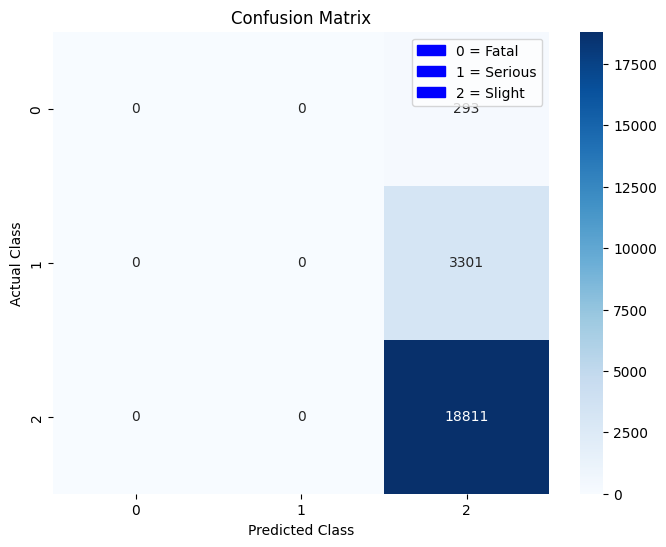

Logistic Regression:
Accuracy: 0.8395893773711225
---------------------------------------------------


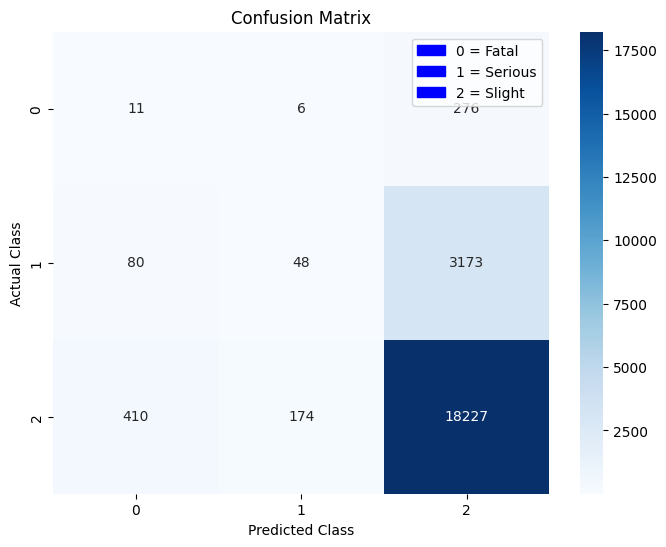

Naive Bays:
Accuracy: 0.8161571077884401
---------------------------------------------------


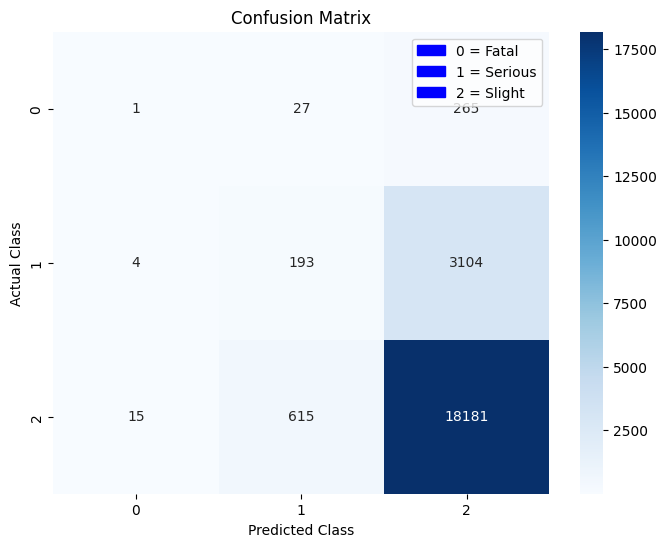

KNN:
Accuracy: 0.8201294353938853
---------------------------------------------------


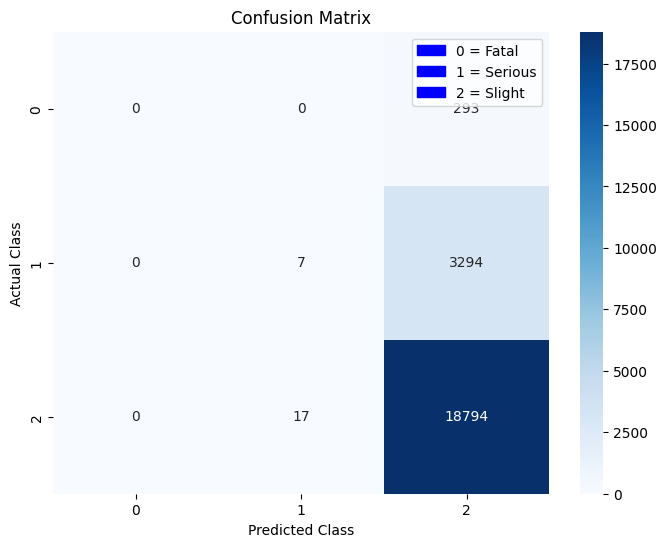

Neural Network:
Accuracy: 0.8391430484266905
---------------------------------------------------


In [82]:
model = LogisticRegression(max_iter=10000)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
model.fit(X_train, y_train)

# Evaluate the Naive Bayes model on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
legend_labels = {
0: 'Fatal',
1: 'Serious',
2: 'Slight'
}
    
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
plt.legend(handles=handles, loc='upper right')
plt.show()

# Calculate the accuracy
true_positive = np.diag(confusion_mat)
accuracy = np.sum(true_positive) / np.sum(confusion_mat)
print("Logistic Regression:")
print("Accuracy:", accuracy)
print("---------------------------------------------------")

model = GaussianNB()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
model.fit(X_train, y_train)

# Evaluate the Naive Bayes model on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
legend_labels = {
0: 'Fatal',
1: 'Serious',
2: 'Slight'
}
    
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
plt.legend(handles=handles, loc='upper right')
plt.show()

# Calculate the accuracy
true_positive = np.diag(confusion_mat)
accuracy = np.sum(true_positive) / np.sum(confusion_mat)
print("Naive Bays:")
print("Accuracy:", accuracy)
print("---------------------------------------------------")

model = KNeighborsClassifier()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
model.fit(X_train, y_train)

# Evaluate the Naive Bayes model on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
legend_labels = {
0: 'Fatal',
1: 'Serious',
2: 'Slight'
}
    
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
plt.legend(handles=handles, loc='upper right')
plt.show()

# Calculate the accuracy
true_positive = np.diag(confusion_mat)
accuracy = np.sum(true_positive) / np.sum(confusion_mat)
print("KNN:")
print("Accuracy:", accuracy)
print("---------------------------------------------------")

model = MLPClassifier(max_iter=10000)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
model.fit(X_train, y_train)

# Evaluate the Naive Bayes model on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
legend_labels = {
0: 'Fatal',
1: 'Serious',
2: 'Slight'
}
    
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
plt.legend(handles=handles, loc='upper right')
plt.show()

# Calculate the accuracy
true_positive = np.diag(confusion_mat)
accuracy = np.sum(true_positive) / np.sum(confusion_mat)
print("Neural Network:")
print("Accuracy:", accuracy)
print("---------------------------------------------------")

### **Implementing ROC Curves**

Linear Regression auc  0 =  0.736207819453431
Linear Regression auc  1 =  0.6096105844784865
Linear Regression auc  2 =  0.6241000785513466
Logistic Regression ROC:


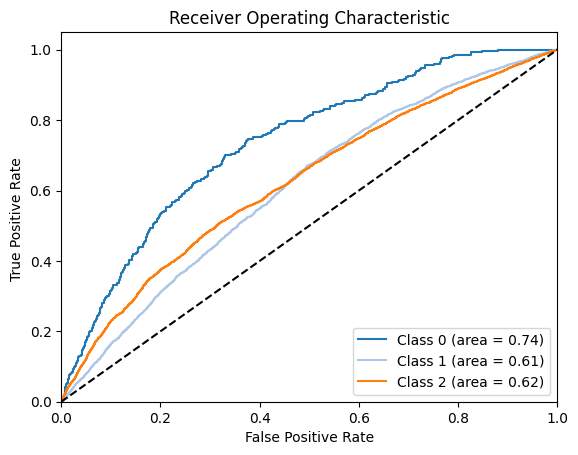

---------------------------------------------------
Naive Bays auc 0 =  0.7237993793927779
Naive Bays auc 1 =  0.601821446295397
Naive Bays auc 2 =  0.6156617327498766
Naive Bays ROC:


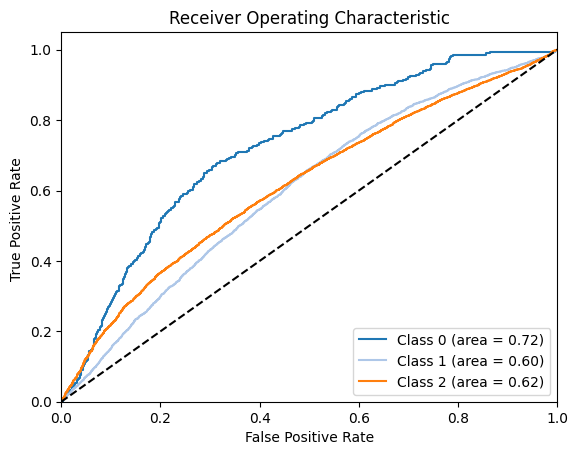

---------------------------------------------------
KNN auc  0 =  0.5258013964279893
KNN auc  1 =  0.5498186206453859
KNN auc  2 =  0.5601478545021862
KNN ROC:


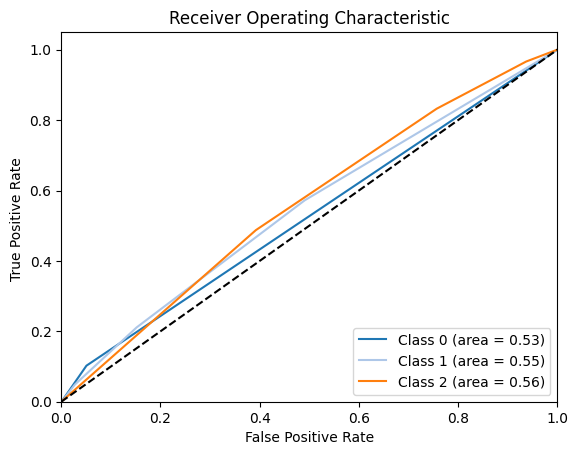

---------------------------------------------------
Neural Network auc  0 =  0.7128152736549395
Neural Network auc  1 =  0.6118574735233271
Neural Network auc  2 =  0.6259965020644245
Neural Network ROC:


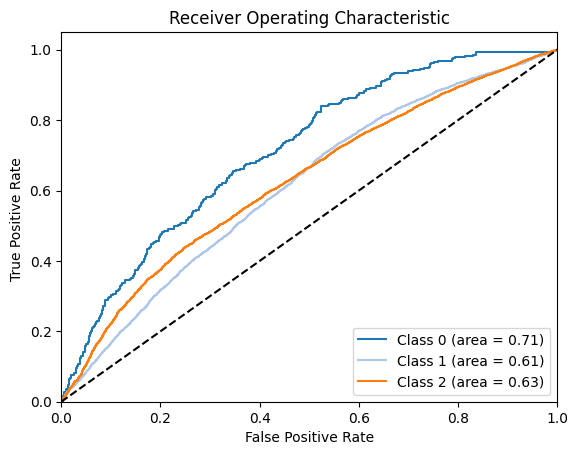

---------------------------------------------------


In [96]:
model = LogisticRegression(max_iter=10000)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Predict probabilities for each class
y_scores = model.predict_proba(X_test)

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("Linear Regression auc ",i,"= ",roc_auc[i])

# Plot the ROC curves for each class
cmap = plt.colormaps['tab20']  # Choose a colormap that supports a larger number of classes
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

print("Logistic Regression ROC:")
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("---------------------------------------------------")

model = GaussianNB()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Predict probabilities for each class
y_scores = model.predict_proba(X_test)

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("Naive Bays auc",i,"= ",  roc_auc[i])

# Plot the ROC curves for each class
cmap = plt.colormaps['tab20']  # Choose a colormap that supports a larger number of classes
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

print("Naive Bays ROC:")
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("---------------------------------------------------")

model = KNeighborsClassifier()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Predict probabilities for each class
y_scores = model.predict_proba(X_test)

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("KNN auc ",i,"= ",roc_auc[i])

# Plot the ROC curves for each class
cmap = plt.colormaps['tab20']  # Choose a colormap that supports a larger number of classes
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

print("KNN ROC:")
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("---------------------------------------------------")

model = MLPClassifier(max_iter=10000)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Predict probabilities for each class
y_scores = model.predict_proba(X_test)

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("Neural Network auc ",i,"= ", roc_auc[i])

# Plot the ROC curves for each class
cmap = plt.colormaps['tab20']  # Choose a colormap that supports a larger number of classes
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

print("Neural Network ROC:")
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("---------------------------------------------------")

### **Implementing Learning Curves**

Logistic Regression Learning Curve:


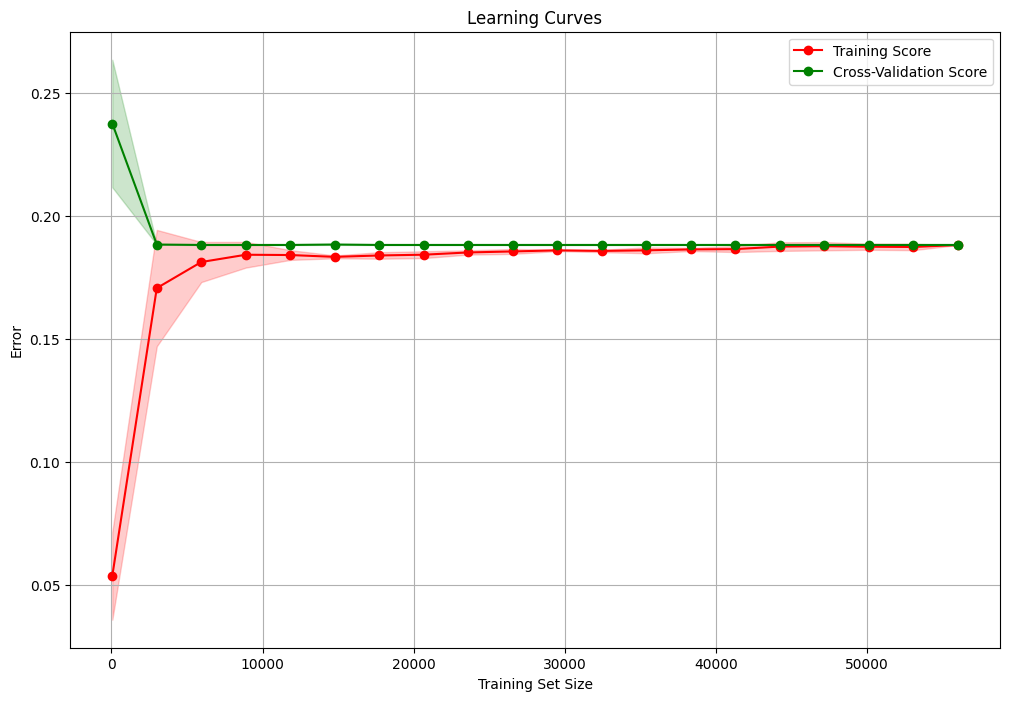

---------------------------------------------------
Naive Bays Curve:


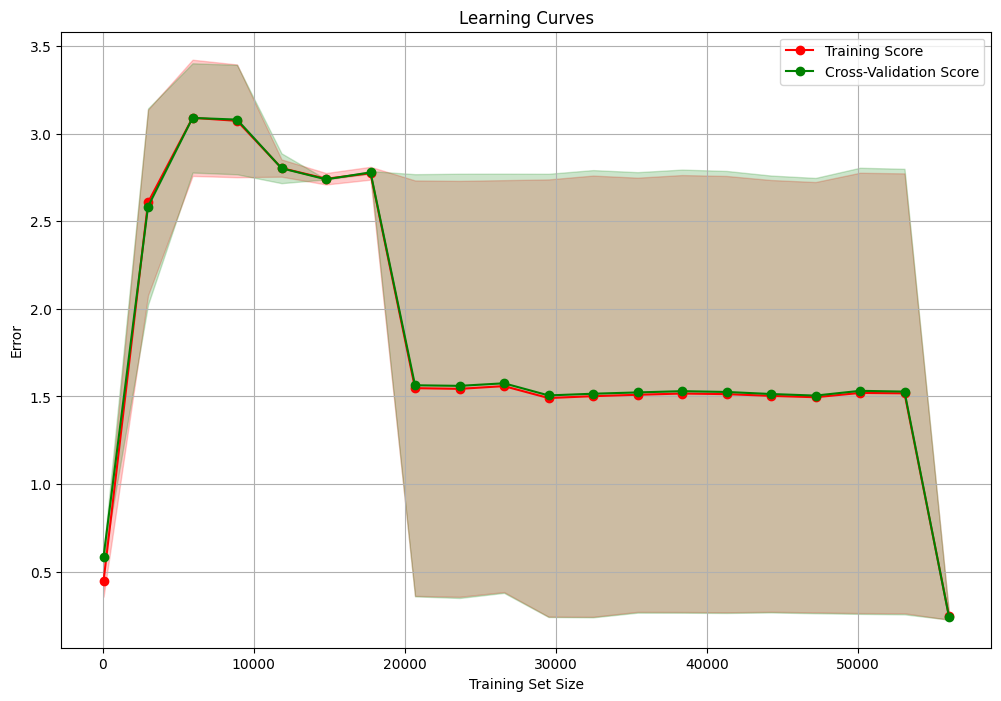

---------------------------------------------------
KNN Curve:


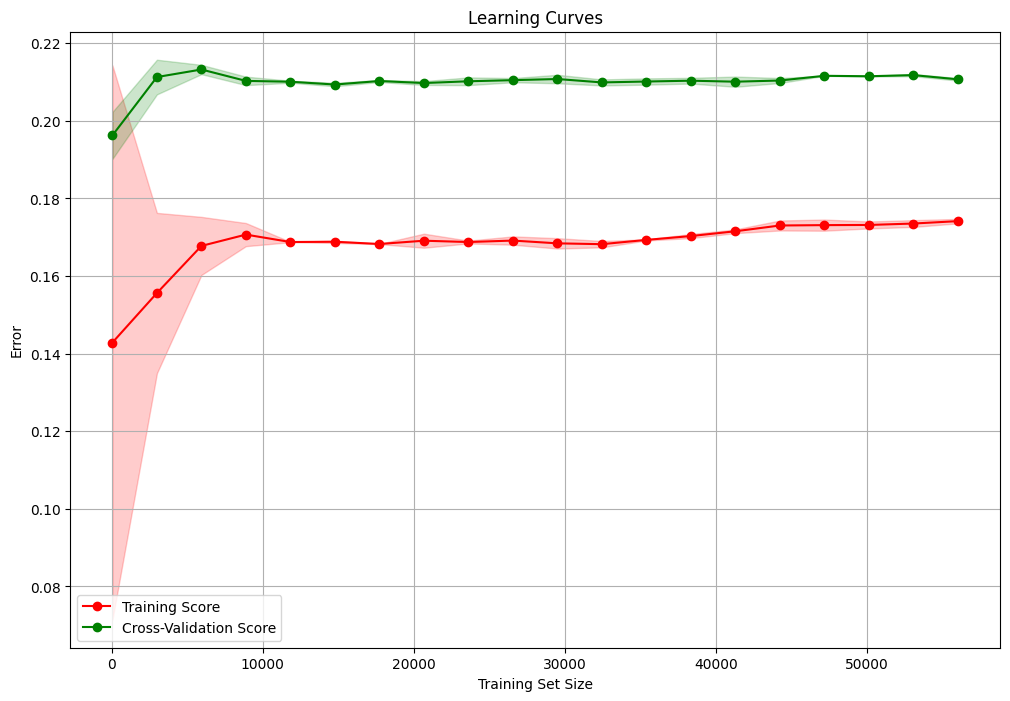

---------------------------------------------------
Neural Network Curve:


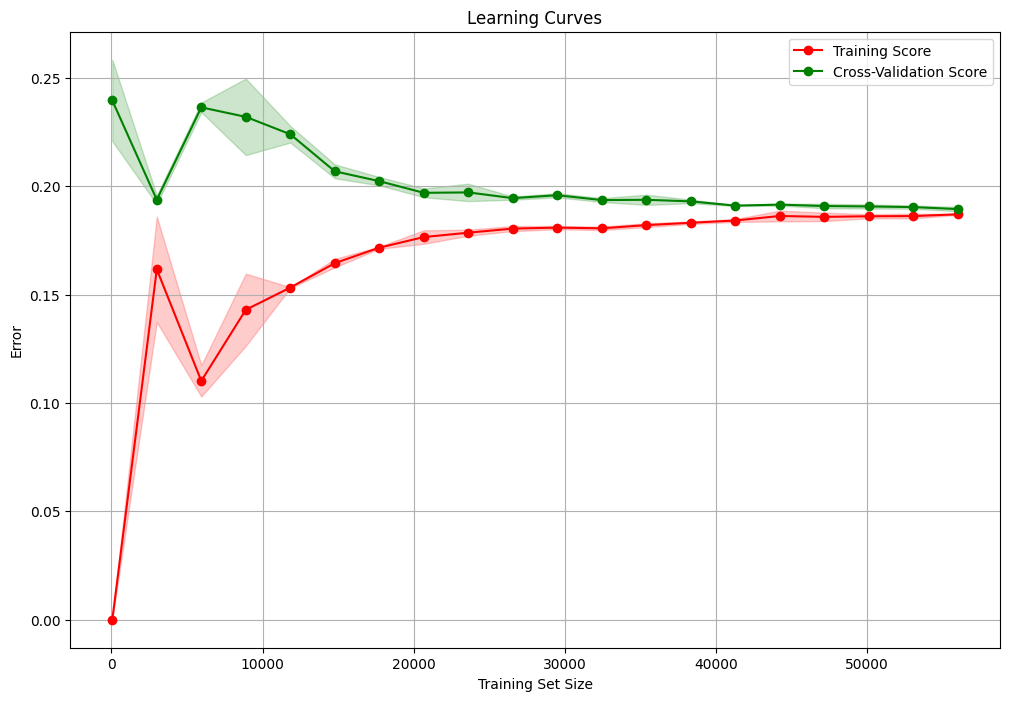

---------------------------------------------------


In [89]:
model = LogisticRegression(max_iter = 10000)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=2, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.001, 1.0, 20))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("Logistic Regression Learning Curve:")
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("---------------------------------------------------")

model = GaussianNB()
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=2, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.001, 1.0, 20))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("Naive Bays Curve:")
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("---------------------------------------------------")

model = KNeighborsClassifier()
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=2, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.001, 1.0, 20))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("KNN Curve:")
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("---------------------------------------------------")

model = MLPClassifier(max_iter=100000)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=2, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.001, 1.0, 20))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("Neural Network Curve:")
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("---------------------------------------------------")

## ***3- Results and Comparison between the performance of all the classifiers***

### ***K-Fold Sampling***

1.   **Logistic Regression:** 84.6%
2.   **Naive Bayes:** 82.2%
3.   **KNN:**82.3%
4.   **Neural Network:** 84.6%

**Result:** Based on the accuracies obtained by our method, Logistic Regression and Neural Network shows the best results for the K-fold Sampling.

### ***Stratified Sampling***

1.   **Logistic Regression:** 84.6%
2.   **Naive Bayes:** 81.2%
3.   **KNN:**82.2%
4.   **Neural Network:** 84.6%

**Result:** Based on the accuracies obtained by our method, Logistic Regression and Neural Network shows the best results for the K-fold Sampling.

### ***Confusion Matrix***



1.   **Logistic Regression:** 84%
2.   **Naive Bayes:** 81.6%
3.   **KNN:** 82%
4.   **Neural Network:** 84%

**Result:** Based on the accuracies obtained by our method, Logistic Regression and Neural Network shows the best results for the K-fold Sampling.

### ***ROC Curve***



1.   **Logistic Regression:** AUC Range 0.61 --> 0.74
2.   **Naive Bayes:** AUC Range 0.61 --> 0.72
3.   **KNN:** AUC Range 0.53 --> 0.56
4.   **Neural Network:** AUC Range 0.61 --> 0.71

**Result:** Based on the resulted area under curve (AUC) Logistic Regression shows the best results for the ROC Curves.

### ***Learning Curves***



1.   **Logistic Regression:** Range 8,000 --> 56,000
2.   **Naive Bayes:** Range 22,000 --> 53,000
3.   **KNN:** Range 12,000 --> 56,000
4.   **Neural Network:** Range 32,000 --> 44,000

**Result:** Based on the resulted graphs above, Logistic Regression shows the best results for the learning curves.
